In [31]:
pip install librosa matplotlib IPython

In [1]:
import librosa
from librosa import display
import numpy as np
import IPython.display as ipd
import matplotlib as plt

# First generate the following two pictures

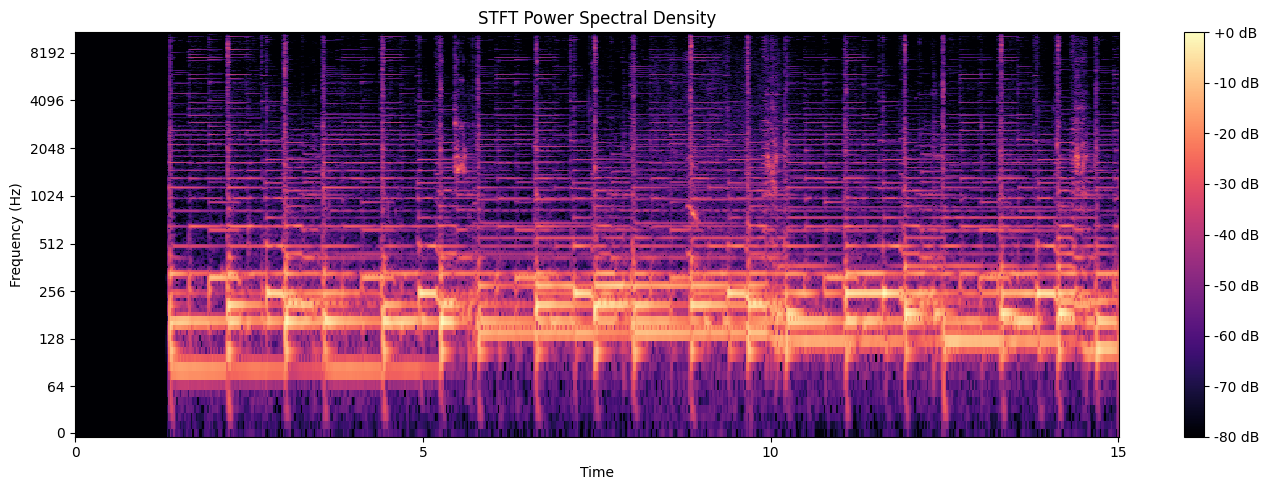

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

##############🛑🛑 Modify the path here 🛑🛑###############
audio_path = '.../Photograph_background.wav'
y, sr = librosa.load(audio_path)

# Perform STFT
D = librosa.stft(y)
# Calculate power spectral density
psd = np.abs(D)**2

# Calculate frequencies
freqs = librosa.fft_frequencies(sr=sr, n_fft=D.shape[0])

# Convert to decibels (dB)
psd_db = librosa.power_to_db(psd, ref=np.max)

# Plot frequency-PSD graph
plt.figure(figsize=(14, 5))
librosa.display.specshow(psd_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Power Spectral Density')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


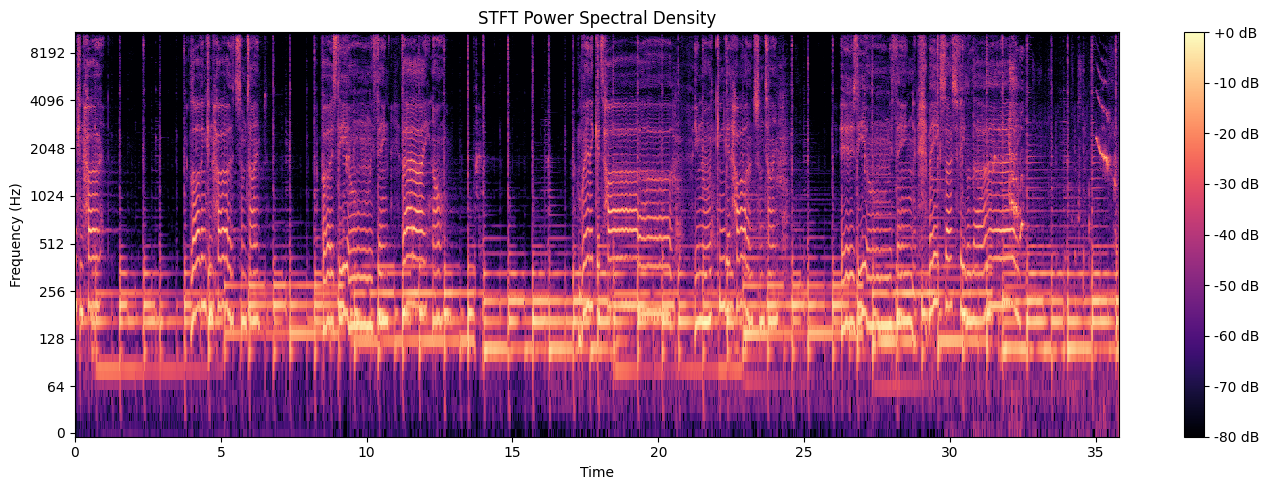

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

##############🛑🛑Modify the path here🛑🛑###############
audio_path = '.../Photograph_voice_background.wav'
y, sr = librosa.load(audio_path)

# Perform STFT
D = librosa.stft(y)
# Calculate Power Spectral Density
psd = np.abs(D)**2

# Calculate frequencies
freqs = librosa.fft_frequencies(sr=sr, n_fft=D.shape[0])

# Convert to decibels (dB)
psd_db = librosa.power_to_db(psd, ref=np.max)

# Plot frequency-PSD graph
plt.figure(figsize=(14, 5))
librosa.display.specshow(psd_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Power Spectral Density')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


# Low/High Pass Filter

## Change the size of cutoff_freq here to 500, 1000, 2000, 3000, 4000, 5000, and save them as wav respectively. Remember to rename it! ! ! ! ! Otherwise, the original file will be overwritten.

In [9]:
import librosa
import numpy as np
import soundfile as sf

# Load the audio file
y, sr = librosa.load('.../Photograph_voice_background.wav')

# Obtain the STFT of the audio
S_full = librosa.stft(y)

# Define the cutoff frame numbers for the low-pass and high-pass filters
##############🛑🛑Modify here🛑🛑###############
cutoff_freq = 5000
cutoff_bin = int(cutoff_freq / (sr / len(S_full) * 2))

# Create a low-pass filter mask
low_pass_mask = np.ones_like(S_full)
low_pass_mask[cutoff_bin:, :] = 0

# Create a high-pass filter mask
high_pass_mask = np.zeros_like(S_full)
high_pass_mask[cutoff_bin:, :] = 1

# Apply the low-pass and high-pass filters
S_low_pass = S_full * low_pass_mask
S_high_pass = S_full * high_pass_mask

# Convert the filtered signal back to the time domain
y_low_pass = librosa.istft(S_low_pass)
y_high_pass = librosa.istft(S_high_pass)

# Save the filtered audio
sf.write('Photograph_high_pass_5000.wav', y_high_pass, sr)


## Comparision: FFT

In [11]:
import librosa
import numpy as np
import soundfile as sf

# Load audio file
y, sr = librosa.load('.../Photograph_voice_background.wav')  # Ensure this is your audio file's actual path

# Perform FFT
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(y), 1/sr)

# Define cutoff frequency for low-pass and high-pass filters
cutoff_freq = 2000  # Cutoff frequency is 500Hz

# Create masks for low-pass and high-pass filters
low_pass_mask = np.abs(freqs) <= cutoff_freq
high_pass_mask = np.abs(freqs) > cutoff_freq

# Apply low-pass and high-pass filters
Y_low_pass = Y * low_pass_mask
Y_high_pass = Y * high_pass_mask

# Convert the filtered signal back to the time domain
y_low_pass = np.fft.ifft(Y_low_pass).real
y_high_pass = np.fft.ifft(Y_high_pass).real

# Save the filtered audio
sf.write('Photograph_high_pass_2000_FFTcomparision.wav', y_high_pass, sr)  # Ensure this is the actual path where you want to save the file


# OpenAI

In [ ]:
%pip install -U openai-whisper
%pip install -U certifi


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import whisper
model = whisper.load_model('base')

### 500Hz high-pass

In [19]:
result0 = model.transcribe('/Users/krantlee/Documents/Study/University of Washington/TECHIN 513/Final Report/Photograph_high_pass_500.wav', fp16=False)
result0['text']

" Love can hurt, love can hurt sometimes But it's the only thing that I know When it gets hard, you know it can get hard sometimes It is the only thing that makes us feel alive"

### 1000Hz high-pass

In [18]:
result2 = model.transcribe('/Users/krantlee/Documents/Study/University of Washington/TECHIN 513/Final Report/Photograph_high_pass_1000.wav', fp16=False)
result2['text']

" Love can hurt, love can hurt sometimes But it's the only thing that I know When it gets hard, you know it can get hard sometimes It is the only thing that makes us feel alive"

### 2000Hz high-pass

In [16]:
result2 = model.transcribe('/Users/krantlee/Documents/Study/University of Washington/TECHIN 513/Final Report/Photograph_high_pass_2000.wav', fp16=False)
result2['text']

" I can't hurt, I can't hurt sometimes But it's the only thing that I know When it gets hard, you know it can get hard sometimes It is the only thing that makes us feel alive"

### 2000Hz high-pass + amplify

In [ ]:
import librosa
import soundfile as sf

# Load audio file
audio_path = ' '
y, sr = librosa.load(audio_path, sr=None)

# Amplify the volume to twice its original level
y_amplified = y * 2

# Save the amplified audio
amplified_audio_path = 'Photograph_high_pass_2000_amplified.wav'
sf.write(amplified_audio_path, y_amplified, sr)


In [ ]:
result2_1 = model.transcribe('Dont_know_why_high_pass_2000_amplified.wav', fp16=False)
result2_1['text']

" I wait until I saw the sun We don't know why it didn't come I have to lie in the house of fun We don't know why it didn't come"

### 3000Hz high-pass

In [ ]:
result3 = model.transcribe(' ', fp16=False)
result3['text']

" I wait until I saw the sun I don't know why it didn't come I left you in my house, I find I don't know why it didn't come"

### 3000Hz high-pass + amplify

In [ ]:
import librosa
import soundfile as sf

# Load audio file
audio_path = ' '
y, sr = librosa.load(audio_path, sr=None)

# Amplify the volume to twice its original level
y_amplified = y * 2

# Save the amplified audio
amplified_audio_path = 'Photograph_high_pass_3000_amplified.wav'
sf.write(amplified_audio_path, y_amplified, sr)


In [ ]:
result3_1 = model.transcribe(' ', fp16=False)
result3_1['text']

" I wait until I saw the sun We don't know why it didn't come I have to lie in the house of mine We don't know why it didn't come"

### 4000Hz high-pass

In [ ]:
result4 = model.transcribe(' ', fp16=False)
result4['text']

" I wait until I saw the sun I don't know why it didn't come I left you in my house, I find I don't know why it didn't come"

### 4000Hz high-pass + amplify

In [ ]:
import librosa
import soundfile as sf

# Load audio file
audio_path = ' '
y, sr = librosa.load(audio_path, sr=None)

# Amplify the volume to twice its original level
y_amplified = y * 2

# Save the amplified audio
amplified_audio_path = 'Photograph_high_pass_4000_amplified.wav'
sf.write(amplified_audio_path, y_amplified, sr)


In [ ]:
result5 = model.transcribe(' ', fp16=False)
result5['text']

" I wait until I saw the sun We don't know why it didn't come I have to lie in the house of fun We don't know why it didn't come"

### 5000Hz high-pass

In [ ]:
result5 = model.transcribe(' ', fp16=False)
result5['text']

" I wait until I saw the sun I don't know why it didn't come I left you in my house, I find I don't know why it didn't come"

### 5000Hz high-pass + amplify

In [ ]:
import librosa
import soundfile as sf

# Load audio file
audio_path = ' '
y, sr = librosa.load(audio_path, sr=None)

# Amplify the volume to twice its original level
y_amplified = y * 2

# Save the amplified audio
amplified_audio_path = 'Photograph_high_pass_5000_amplified.wav'
sf.write(amplified_audio_path, y_amplified, sr)


In [ ]:
result5 = model.transcribe('Photograph_high_pass_5000_amplified.wav', fp16=False)
result5['text']

" I wait until I saw the sun We don't know why it didn't come I have to lie in the house of fun We don't know why it didn't come"